### Importando Bibliotecas

In [1]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import Image



In [6]:
arquivo = '2018.csv'

### Main Gráficos

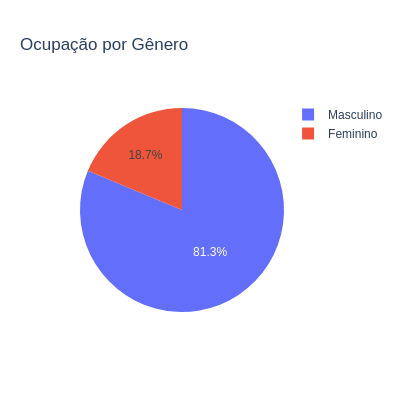

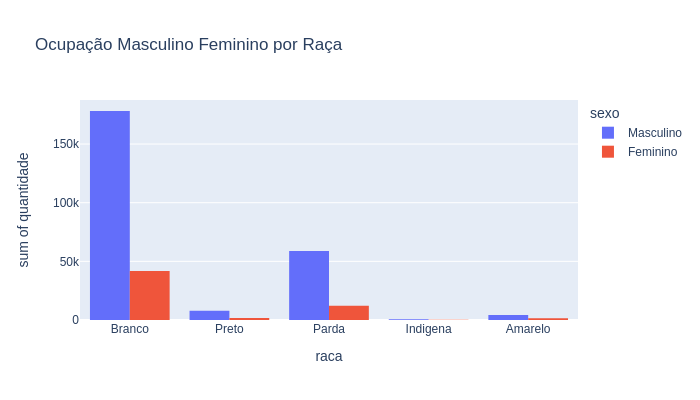

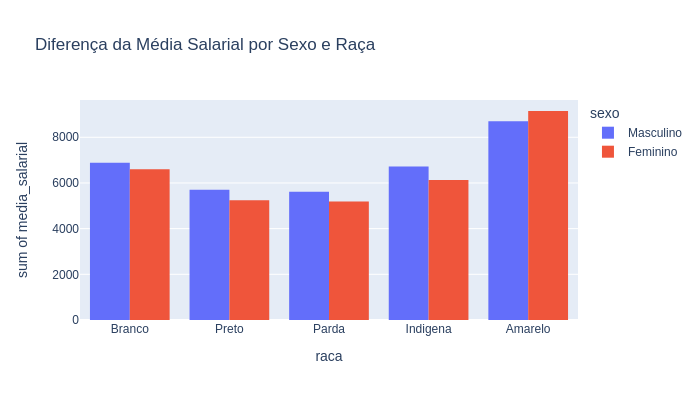

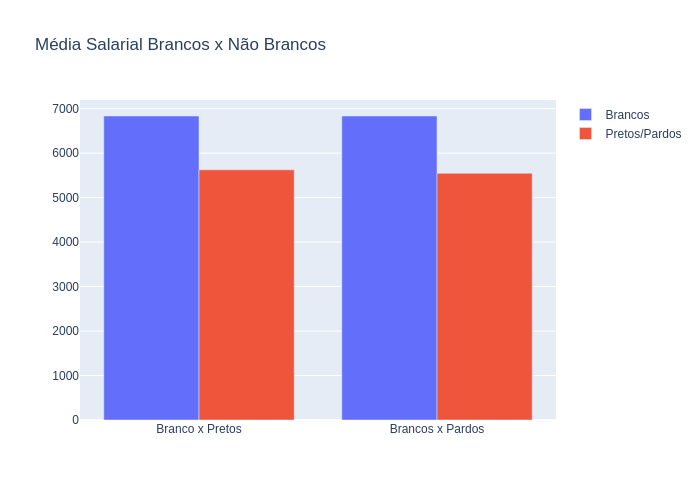

In [7]:
## Executar função de gerando_graficos abaixo
def init(arquivo):
    dicionario_sexo = {1: 'Masculino', 2:'Feminino', -1: 'Ignorado'}
    dicionario_cor = {1: 'Indígena', 2: 'Branco', 4: 'Preta', 6: 'Amarelo', 8:'Parda', 9:'Não Identificado', -1: 'Ignorado'}
    df = pd.read_csv(arquivo)
    # Filtragem de dados
    df = df[df.raca_cor != -1]
    df = df[df.raca_cor != 9]
    df = df[df.sexo != -1]
    df['sexo'] = df.sexo.apply(lambda x: dicionario_sexo[x])
    df['raca_cor'] = df.raca_cor.apply(lambda x: dicionario_cor[x])
    gerando_graficos(df, arquivo[0:4])
init(arquivo)

### Gerando Gráficos Direcionados para cada Ano

In [3]:
def gerando_graficos(df, ano):
    import pandas as pd
    import plotly.express as px
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go
    import plotly.express as px
    import chart_studio.plotly as py



    ## Pizza
    d = {'sexo': ['Masculino', 'Feminino'], 'quantidade': [len(df[(df['sexo'] == 'Masculino')]), len(df[(df['sexo'] == 'Feminino')])]}
    proporcao_pie = px.pie(d, names='sexo', values='quantidade', title='Ocupação por Gênero', width=400, height=400)
    proporcao_pie.update_traces(textposition='inside')
    #proporcao_pie.show()
    proporcao_pie.write_image('./images/' + ano + '_pizza.png')
    display(Image(filename='./images/' + ano + '_pizza.png'))

    
    ## Ocupação Masculino Feminino por Raça
    branco_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Branco')].shape[0]
    branco_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Branco')].shape[0]
    preto_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Preta')].shape[0]
    preto_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Preta')].shape[0]
    parda_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Parda')].shape[0]
    parda_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Parda')].shape[0]
    indigena_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Indígena')].shape[0]
    indigena_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Indígena')].shape[0]
    amarelo_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Amarelo')].shape[0]
    amarelo_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Amarelo')].shape[0]

    d = {'sexo': ['Masculino', 'Feminino']*5, 
         'raca': ['Branco', 'Branco', 'Preto', 'Preto', 'Parda', 'Parda', 'Indigena', 'Indigena', 'Amarelo', 'Amarelo'], 
         'quantidade': [branco_masculino, branco_feminino, 
                        preto_masculino, preto_feminino, 
                        parda_masculino, parda_feminino, 
                       indigena_masculino, indigena_feminino,
                       amarelo_masculino, amarelo_feminino]}

    df_teste = pd.DataFrame(d)

    import plotly.express as px
    fig = px.histogram(df_teste, x="raca", y="quantidade",
                 color='sexo', barmode='group',
                 height=400, title='Ocupação Masculino Feminino por Raça')
    #fig.show()
    fig.write_image('./images/' + ano + '_masculino_feminino_raca.png')
    display(Image(filename='./images/' + ano + '_masculino_feminino_raca.png'))

    
    
    ## Diferença da Média Salarial por Sexo e Raça
    branco_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Branco')]['valor_remuneracao_media'].mean()
    branco_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Branco')]['valor_remuneracao_media'].mean()
    preto_masculino =df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Preta')]['valor_remuneracao_media'].mean()
    preto_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Preta')]['valor_remuneracao_media'].mean()
    parda_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Parda')]['valor_remuneracao_media'].mean()
    parda_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Parda')]['valor_remuneracao_media'].mean()
    indigena_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Indígena')]['valor_remuneracao_media'].mean()
    indigena_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Indígena')]['valor_remuneracao_media'].mean()
    amarelo_masculino = df[(df['sexo'] == 'Masculino') & (df['raca_cor'] == 'Amarelo')]['valor_remuneracao_media'].mean()
    amarelo_feminino = df[(df['sexo'] == 'Feminino') & (df['raca_cor'] == 'Amarelo')]['valor_remuneracao_media'].mean()

    d = {'sexo': ['Masculino', 'Feminino']*5, 
         'raca': ['Branco', 'Branco', 'Preto', 'Preto', 'Parda', 'Parda', 'Indigena', 'Indigena', 'Amarelo', 'Amarelo'], 
         'media_salarial': [branco_masculino, branco_feminino, 
                        preto_masculino, preto_feminino, 
                        parda_masculino, parda_feminino, 
                       indigena_masculino, indigena_feminino,
                       amarelo_masculino, amarelo_feminino]}

    df_teste = pd.DataFrame(d)

    fig = px.histogram(df_teste, x="raca", y="media_salarial",
                 color='sexo', barmode='group',
                 height=400, title='Diferença da Média Salarial por Sexo e Raça')
    #print(indigena_masculino, indigena_feminino)
    #fig.show()
    fig.write_image('./images/' + ano + '_salario_sexo_raca.png')
    display(Image(filename='./images/' + ano + '_salario_sexo_raca.png'))

    ### Diferença Entre Média Salarial Brancos x Pretos e Pardos
    brancos = df[(df['raca_cor'] == 'Branco')]['valor_remuneracao_media'].mean()

    pretos = df[(df['raca_cor'] == 'Preta')]['valor_remuneracao_media'].mean()


    pardos = df[(df['raca_cor'] == 'Parda')]['valor_remuneracao_media'].mean()
    d = { 'raca': ['Branco', 'Pretos', 'Branco', 'Pardos'],
         'media_salarial': [brancos, pretos, brancos, pardos]
        }
    df_teste = pd.DataFrame(d)

    fig = go.Figure(data=[
        go.Bar(name='Brancos', x=['Branco x Pretos', 'Brancos x Pardos'], y=[brancos, brancos]),
        go.Bar(name='Pretos/Pardos', x=['Branco x Pretos', 'Brancos x Pardos'], y=[pretos, pardos]),],)
    # Change the bar mode
    fig.update_layout(barmode='group', title= 'Média Salarial Brancos x Não Brancos')
    #fig.show()
    fig.write_image('./images/' + ano + '_brancos_nao_brancos.png')
    display(Image(filename='./images/' + ano + '_brancos_nao_brancos.png'))


### Medias Salariais Anuais por Raça

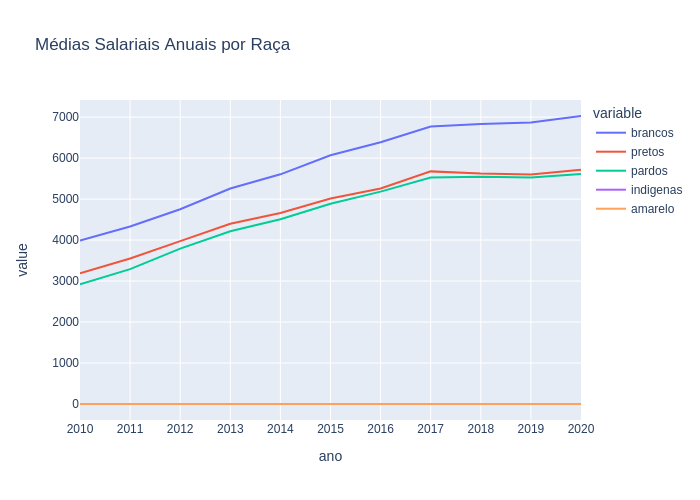

In [29]:
medias_anuais = []
anos = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for ano in anos:
    dicionario_sexo = {1: 'Masculino', 2:'Feminino', -1: 'Ignorado'}
    dicionario_cor = {1: 'Indígena', 2: 'Branco', 4: 'Preta', 6: 'Amarelo', 8:'Parda', 9:'Não Identificado', -1: 'Ignorado'}
    df = pd.read_csv(ano + '.csv')
    df = df[df.raca_cor != -1]
    df = df[df.raca_cor != 9]
    df = df[df.sexo != -1]
    df['sexo'] = df.sexo.apply(lambda x: dicionario_sexo[x])
    df['raca_cor'] = df.raca_cor.apply(lambda x: dicionario_cor[x])
    mid_brancos = df[(df['raca_cor'] == 'Branco')]['valor_remuneracao_media'].mean()
    mid_pretos = df[(df['raca_cor'] == 'Preta')]['valor_remuneracao_media'].mean()
    mid_pardos = df[(df['raca_cor'] == 'Parda')]['valor_remuneracao_media'].mean()
    mid_indigenas = df[(df['raca_cor'] == 'Indígena')]['valor_remuneracao_media'].mean() *0
    mid_amarelos = df[(df['raca_cor'] == 'Amarelo')]['valor_remuneracao_media'].mean() *0
    json_medias = {'ano': ano, 'brancos': mid_brancos, 'pretos': mid_pretos, 'pardos': mid_pardos, 'indigenas':mid_indigenas, 'amarelo':mid_amarelos}
    medias_anuais.append(json_medias)
import plotly.express as px
df_anuais = pd.DataFrame(medias_anuais)
df_anuais_media_salarial = df_anuais
fig = px.line(df_anuais, x="ano", y=df_anuais.columns,
              hover_data={"ano": "| %Y"},
              title='Médias Salariais Anuais por Raça')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
#fig.show()
fig.write_image('./images/' + ano + 'line_plot.png')
Image(filename='./images/' + ano + 'line_plot.png') 


## Médias Salariais por Sexo (Anuais)

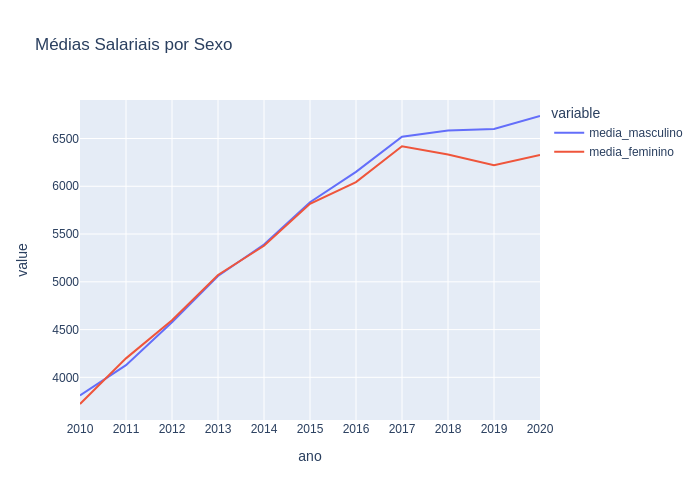

In [30]:
medias_anuais_sexo = []
anos = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for ano in anos:
    dicionario_sexo = {1: 'Masculino', 2:'Feminino', -1: 'Ignorado'}
    dicionario_cor = {1: 'Indígena', 2: 'Branco', 4: 'Preta', 6: 'Amarelo', 8:'Parda', 9:'Não Identificado', -1: 'Ignorado'}
    df = pd.read_csv(ano + '.csv')
    df = df[df.raca_cor != -1]
    df = df[df.raca_cor != 9]
    df = df[df.sexo != -1]
    df['sexo'] = df.sexo.apply(lambda x: dicionario_sexo[x])
    df['raca_cor'] = df.raca_cor.apply(lambda x: dicionario_cor[x])
    masculino = df[(df['sexo'] == 'Masculino')]['valor_remuneracao_media'].mean()
    feminino = df[(df['sexo'] == 'Feminino')]['valor_remuneracao_media'].mean()
    json_medias_sexo = {'ano': ano, 'media_masculino': masculino, 'media_feminino': feminino}
    
    medias_anuais_sexo.append(json_medias_sexo)

    
pd.DataFrame(medias_anuais_sexo)
import plotly.express as px
df_anuais = pd.DataFrame(medias_anuais_sexo)
df_media_anuais_mf = df_anuais
fig = px.line(df_anuais, x="ano", y=df_anuais.columns,
              hover_data={"ano": "| %Y"},
              title='Médias Salariais por Sexo')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
#fig.show()
fig.write_image('./images/' + ano + 'line_plot.png')
Image(filename='./images/' + ano + 'line_plot.png') 


## Crescimento Ocupacional de Mulheres x Homens

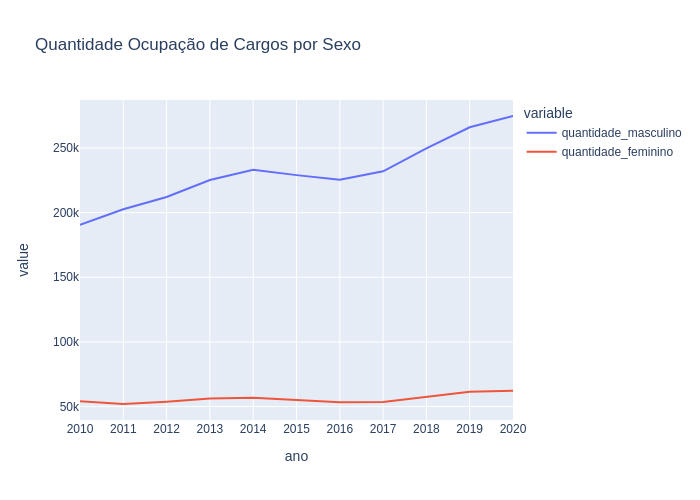

In [31]:
medias_anuais_sexo = []
anos = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for ano in anos:
    dicionario_sexo = {1: 'Masculino', 2:'Feminino', -1: 'Ignorado'}
    dicionario_cor = {1: 'Indígena', 2: 'Branco', 4: 'Preta', 6: 'Amarelo', 8:'Parda', 9:'Não Identificado', -1: 'Ignorado'}
    df = pd.read_csv(ano + '.csv')
    df = df[df.raca_cor != -1]
    df = df[df.raca_cor != 9]
    df = df[df.sexo != -1]
    df['sexo'] = df.sexo.apply(lambda x: dicionario_sexo[x])
    df['raca_cor'] = df.raca_cor.apply(lambda x: dicionario_cor[x])
    masculino = df[(df['sexo'] == 'Masculino')].shape[0]
    feminino = df[(df['sexo'] == 'Feminino')].shape[0]
    json_medias_sexo = {'ano': ano, 'quantidade_masculino': masculino, 'quantidade_feminino': feminino}
    
    medias_anuais_sexo.append(json_medias_sexo)

    
pd.DataFrame(medias_anuais_sexo)
import plotly.express as px
df_anuais = pd.DataFrame(medias_anuais_sexo)
df_anuais_ocupacional = df_anuais

fig = px.line(df_anuais, x="ano", y=df_anuais.columns,
              hover_data={"ano": "| %Y"},
              title='Quantidade Ocupação de Cargos por Sexo')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
#fig.show()
fig.write_image('./images/' + ano + 'line_plot.png')
Image(filename='./images/' + ano + 'line_plot.png') 


### Diversidade de Raças no decorrer dos anos

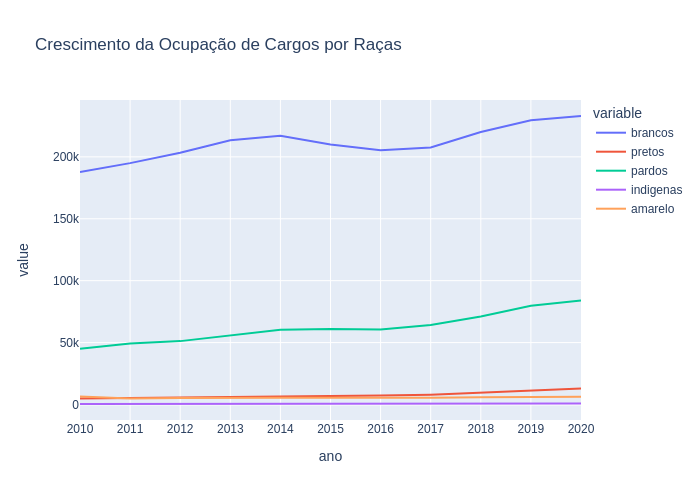

In [32]:
medias_anuais = []
anos = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

for ano in anos:
    dicionario_sexo = {1: 'Masculino', 2:'Feminino', -1: 'Ignorado'}
    dicionario_cor = {1: 'Indígena', 2: 'Branco', 4: 'Preta', 6: 'Amarelo', 8:'Parda', 9:'Não Identificado', -1: 'Ignorado'}
    df = pd.read_csv(ano + '.csv')
    df = df[df.raca_cor != -1]
    df = df[df.raca_cor != 9]
    df = df[df.sexo != -1]
    df['sexo'] = df.sexo.apply(lambda x: dicionario_sexo[x])
    df['raca_cor'] = df.raca_cor.apply(lambda x: dicionario_cor[x])
    mid_brancos = df[(df['raca_cor'] == 'Branco')]['valor_remuneracao_media'].shape[0]
    mid_pretos = df[(df['raca_cor'] == 'Preta')]['valor_remuneracao_media'].shape[0]
    mid_pardos = df[(df['raca_cor'] == 'Parda')]['valor_remuneracao_media'].shape[0]
    mid_indigenas = df[(df['raca_cor'] == 'Indígena')]['valor_remuneracao_media'].shape[0]
    mid_amarelos = df[(df['raca_cor'] == 'Amarelo')]['valor_remuneracao_media'].shape[0]
    json_medias = {'ano': ano, 'brancos': mid_brancos, 'pretos': mid_pretos, 'pardos': mid_pardos, 'indigenas':mid_indigenas, 'amarelo':mid_amarelos}
    medias_anuais.append(json_medias)
import plotly.express as px
df_anuais = pd.DataFrame(medias_anuais)
df_diversidade = df_anuais
fig = px.line(df_anuais, x="ano", y=df_anuais.columns,
              hover_data={"ano": "| %Y"},
              title='Crescimento da Ocupação de Cargos por Raças')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
#fig.show()
fig.write_image('./images/' + ano + 'line_plot.png')
Image(filename='./images/' + ano + 'line_plot.png') 


### Gráficos de Áreas

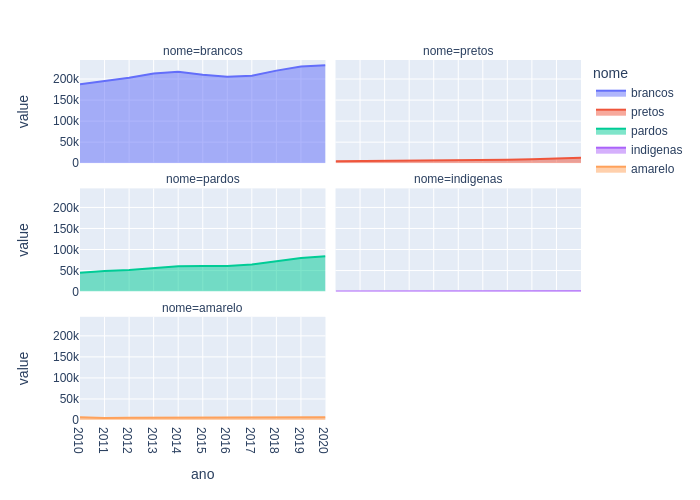

In [33]:
import plotly.express as px
# df_anuais_media_salarial
# df_anuais_ocupacional
# df_media_anuais_mf
df_teste = df_diversidade
df_teste=df_teste.set_index(['ano'])
df_teste.columns.name = "nome"
fig = px.area(df_teste, facet_col="nome", facet_col_wrap=2)
#fig.show()
fig.write_image('./images/' + ano + 'line_plot.png')
Image(filename='./images/' + ano + 'line_plot.png') 


### Análises Por Estados (2020)

In [105]:
df = pd.read_csv('2020.csv')
dicionario_sexo = {1: 'Masculino', 2:'Feminino', -1: 'Ignorado'}
dicionario_cor = {1: 'Indígena', 2: 'Branco', 4: 'Preta', 6: 'Amarelo', 8:'Parda', 9:'Não Identificado', -1: 'Ignorado'}
# Filtragem de dados
df = df[df.raca_cor != -1]
df = df[df.raca_cor != 9]
df = df[df.sexo != -1]
df['sexo'] = df.sexo.apply(lambda x: dicionario_sexo[x])
df['raca_cor'] = df.raca_cor.apply(lambda x: dicionario_cor[x])



In [56]:
dicionario_estados = {
    'Norte': ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PI', 'PE', 'PB', 'RN', 'SE'],
    'Sul': [ 'PR', 'RS', 'SC'],
    'Sudeste': ['MG', 'SP', 'RJ', 'ES'],
    'Centro-Oeste': ['GO', 'MT', 'MS', 'DF']
}


## Ocupação Masculino x Feminino por Região

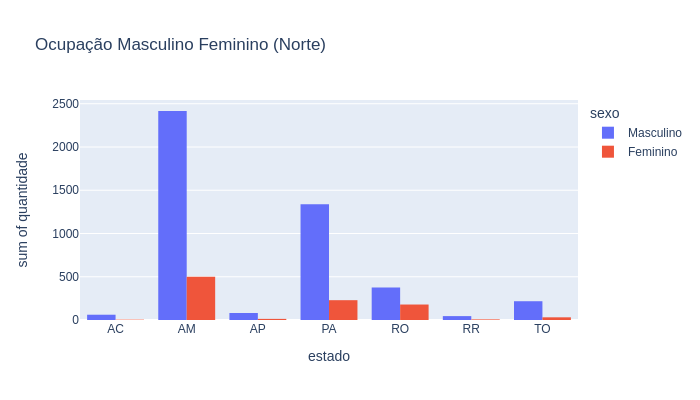

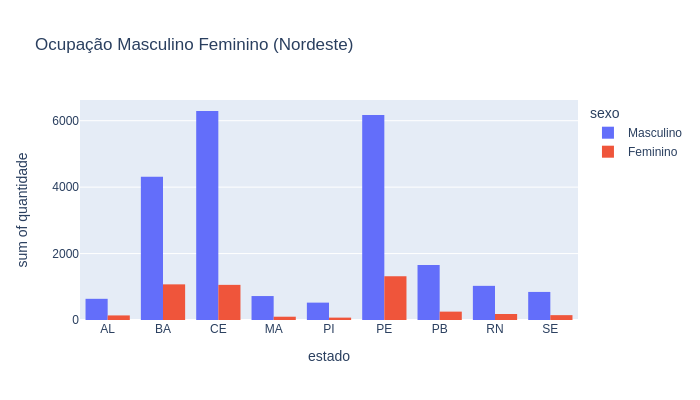

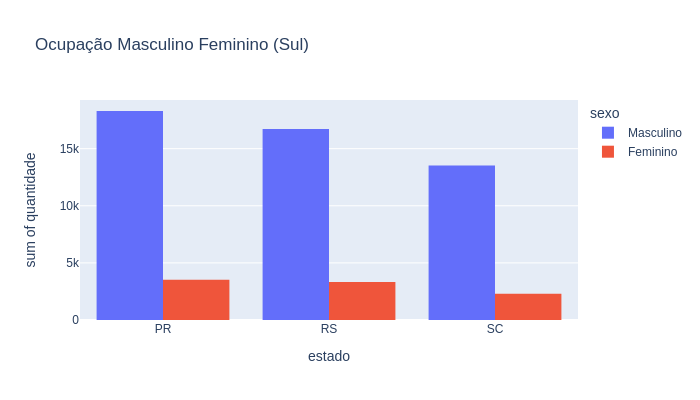

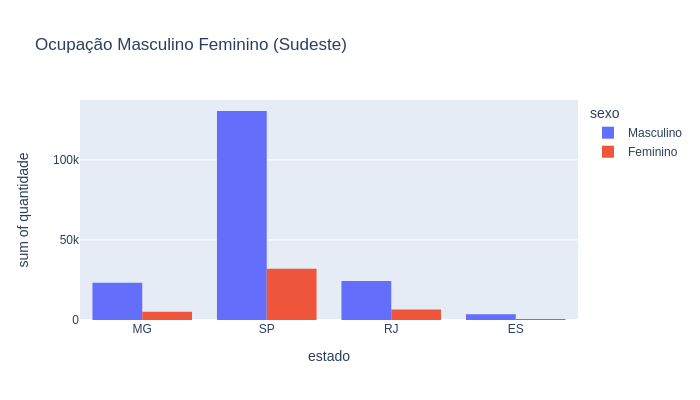

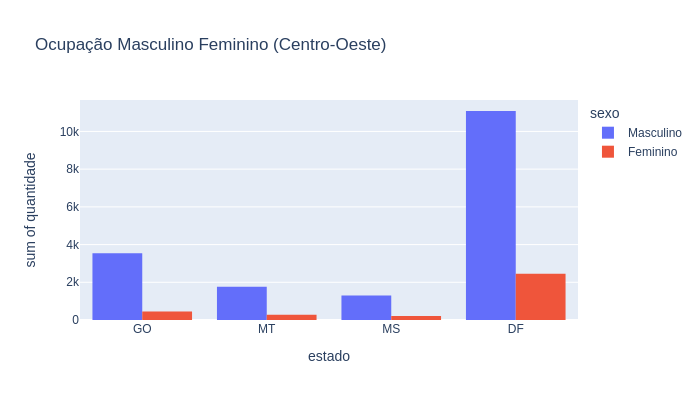

In [109]:
for regiao in dicionario_estados:
    sexo_list = []
    estado_list = []
    quantidade_list = []
    estados = dicionario_estados[regiao]
    #print(estados)
    for estado in estados:

        df2 = df[df['sigla_uf'] == estado]
    
        estado_masculino = df2[(df2['sexo'] == 'Masculino')].shape[0]
        estado_feminino = df2[(df2['sexo'] == 'Feminino')].shape[0]

        sexo_list.append('Masculino')
        sexo_list.append('Feminino')

        estado_list.append(estado)
        estado_list.append(estado)

        quantidade_list.append(estado_masculino)
        quantidade_list.append(estado_feminino)
    #print(df_teste.head(10))
    
    d = {'sexo': sexo_list,  'estado': estado_list,'quantidade': quantidade_list}
    df_teste = pd.DataFrame(d)

    import plotly.express as px
    fig = px.histogram(df_teste, x="estado", y="quantidade",
                 color='sexo', barmode='group',
                 height=400, title='Ocupação Masculino Feminino ({})'.format(regiao))
    #fig.show()
    
    fig.write_image('./images/' + 'temp.png')
    display(Image(filename='./images/' + 'temp.png'))


### Remuneração Média Masculino Feminino por Regiões

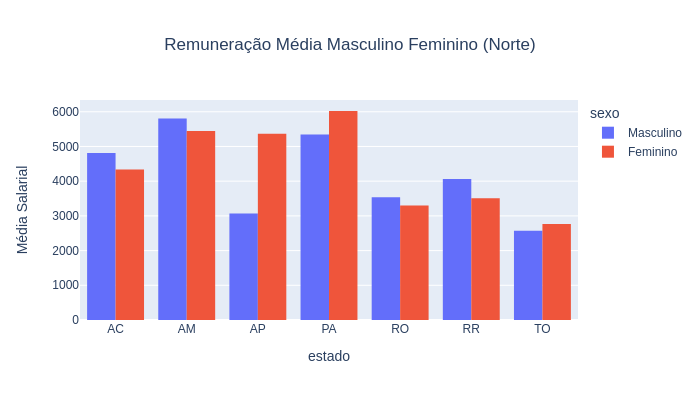

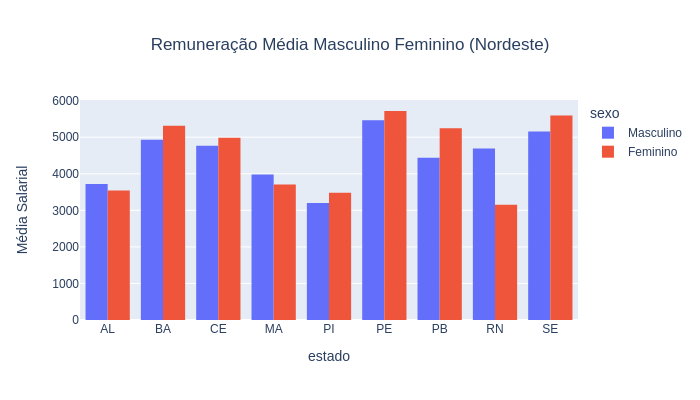

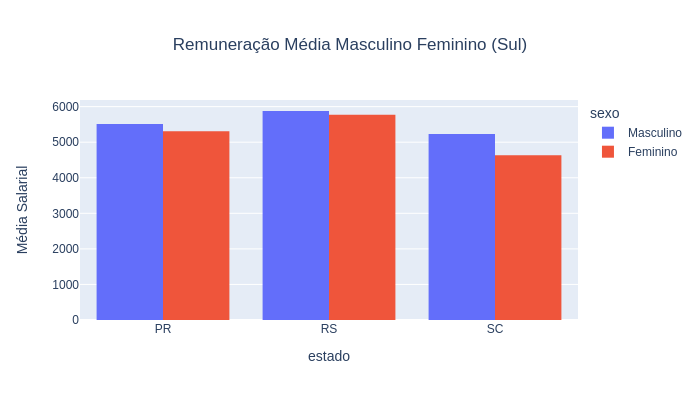

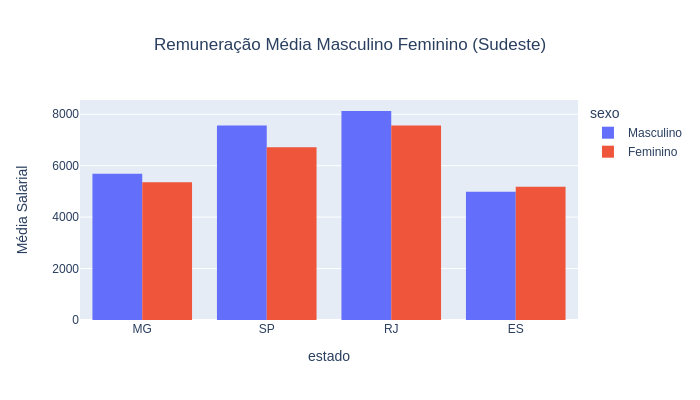

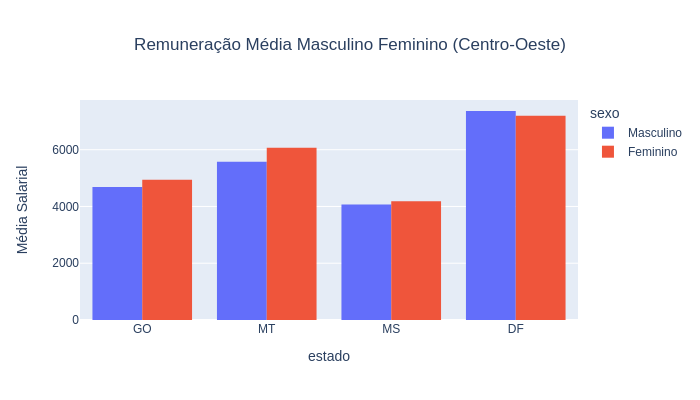

In [113]:
for regiao in dicionario_estados:
    sexo_list = []
    estado_list = []
    quantidade_list = []
    estados = dicionario_estados[regiao]
    for estado in estados:

        df2 = df[df['sigla_uf'] == estado]
    
        estado_masculino = df2[(df2['sexo'] == 'Masculino')]['valor_remuneracao_media'].mean()
        estado_feminino = df2[(df2['sexo'] == 'Feminino')]['valor_remuneracao_media'].mean()

        sexo_list.append('Masculino')
        sexo_list.append('Feminino')

        estado_list.append(estado)
        estado_list.append(estado)

        quantidade_list.append(estado_masculino)
        quantidade_list.append(estado_feminino)
    #print(df_teste.head(10))
    
    d = {'sexo': sexo_list,  'estado': estado_list,'quantidade': quantidade_list}
    df_teste = pd.DataFrame(d)

    import plotly.express as px
    fig = px.histogram(df_teste, x="estado", y="quantidade",
                 color='sexo', barmode='group',
                 height=400, title='Remuneração Média Masculino Feminino ({})'.format(regiao)).update_layout(
    title={"text":'Remuneração Média Masculino Feminino ({})'.format(regiao), "x": 0.5}, yaxis_title="Média Salarial"
)
    #fig.show()
    fig.write_image('./images/' + 'temp.png')
    display(Image(filename='./images/' + 'temp.png'))

#fig.write_image('./images/' + '2021__' + '_masculino_feminino_raca.png')
#display(Image(filename='./images/' + '2021__' + '_masculino_feminino_raca.png'))


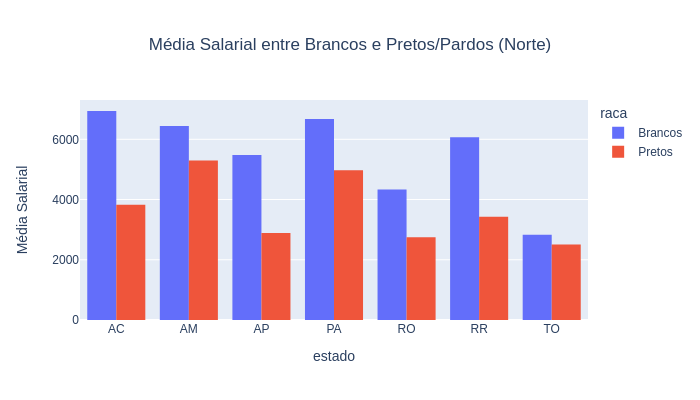

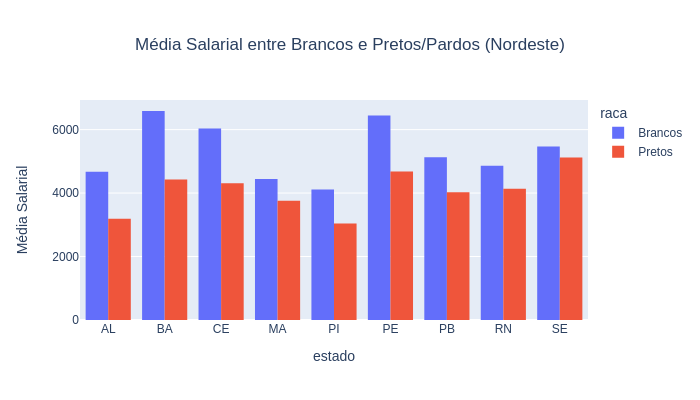

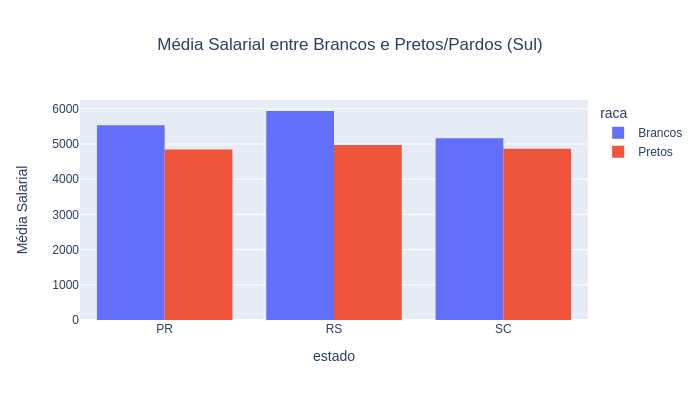

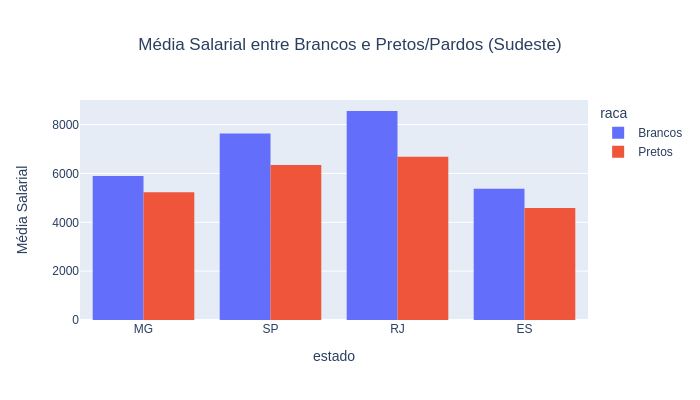

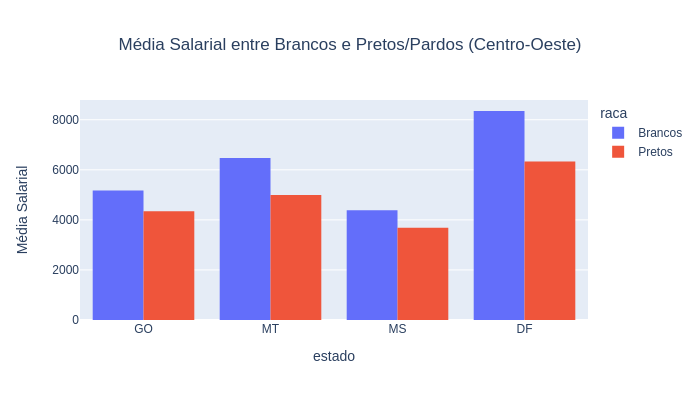

In [116]:
for regiao in dicionario_estados:
    raca = []
    estado_list = []
    quantidade_list = []
    estados = dicionario_estados[regiao]
    for estado in estados:

        df2 = df[df['sigla_uf'] == estado]
    
        estado_masculino = df2[df2['raca_cor'] == 'Branco']['valor_remuneracao_media'].mean()
        estado_feminino = df2[(df2['raca_cor'] == 'Preta') | (df2['raca_cor'] == 'Parda') ]['valor_remuneracao_media'].mean()

        raca.append('Brancos')
        raca.append('Pretos')

        estado_list.append(estado)
        estado_list.append(estado)

        quantidade_list.append(estado_masculino)
        quantidade_list.append(estado_feminino)
    #print(df_teste.head(10))
    
    d = {'raca': raca,  'estado': estado_list,'quantidade': quantidade_list}
    df_teste = pd.DataFrame(d)

    import plotly.express as px
    fig = px.histogram(df_teste, x="estado", y="quantidade",
                 color='raca', barmode='group',
                 height=400, title='Media Salarial entre Brancos e Pretos/Pardos ({})'.format(regiao)).update_layout(
    title={"text":'Média Salarial entre Brancos e Pretos/Pardos ({})'.format(regiao), "x": 0.5}, yaxis_title="Média Salarial"
)
    #fig.show()
    fig.write_image('./images/' + 'temp.png')
    display(Image(filename='./images/' + 'temp.png'))

#fig.write_image('./images/' + '2021__' + '_masculino_feminino_raca.png')
#display(Image(filename='./images/' + '2021__' + '_masculino_feminino_raca.png'))


In [11]:
#df = pd.read_csv('2019.csv')
#df = df[df.raca_cor != -1]
#df = df[df.raca_cor != 9]
#df = df[df.sexo != -1]
#df['sexo'] = df.sexo.apply(lambda x: dicionario_sexo[x])
#df['raca_cor'] = df.raca_cor.apply(lambda x: dicionario_cor[x])
#df[df['sexo'] == 'Masculino']
#print(df[df['sexo'] == 'Masculino'].shape[0]/df.shape[0])
#print(df[df['sexo'] == 'Feminino'].shape[0]/df.shape[0])
#print(df[df['sexo'] == 'Masculino'].shape[0])
#print(df[df['sexo'] == 'Feminino'].shape[0])